# Kavanaugh Analysis

The goal of this notebook is to find which hashtags appear in tweets about Kavanaugh, and analyze the frequency of support and opposition tweets in the period after July 9th when he was nominated until the present (October 12th) after his confirmation.

## Getting relevant hashtags and tweets

I arbitrarily chose Kavanaugh related tweets to be ones that contain "kavan", shortening the name "kavanaugh" to include hashtags like "kavano" which are clearly referring to Kavanaugh.

In [72]:
import sys
import json

In [73]:
infile = 'tag_data2018-09-27.json'

In [81]:
data = []
hashtag2count = {}
counter = 0
# try:
sys.stdout.write("parsing " + infile + "...")
sys.stdout.flush()
with open(infile) as f:
    for line in f:
        if line != None:
            tweet = json.loads(line.rstrip('\n'))
            try:
                if 'kavan' in tweet['text'].lower():
                    hashtags_from_tweet = []
                    for hashtag in tweet['entities']['hashtags']:
                        ht = hashtag['text'].lower()
                        hashtags_from_tweet.append(ht)
                        if ht in hashtag2count.keys():
                            hashtag2count[ht] += 1
                        else:
                            hashtag2count[ht] = 1
                    data.append({'text': tweet['text'], 'hashtags': hashtags_from_tweet})
            except:
                print(tweet)
        counter += 1
#         if counter > 10000:
#             break

parsing tag_data2018-09-27.json...{'limit': {'track': 95, 'timestamp_ms': '1538037941888'}}
{'limit': {'track': 122, 'timestamp_ms': '1538037942312'}}
{'limit': {'track': 99, 'timestamp_ms': '1538037942746'}}
{'limit': {'track': 123, 'timestamp_ms': '1538088394183'}}


In [82]:
data[0]

{'hashtags': ['scotus', 'kavanaugh', 'blaseyford'],
 'text': "RT @pollsofpolitics: Do you believe @realDonaldTrump's #SCOTUS pick #Kavanaugh is guilty of sexual assault as accused by #BlaseyFord and 2…"}

In [83]:
len(data)

101524

## Categorizing hashtags

In [84]:
lib_hashtags = [
    'resist',
    'impeachtrump',
    'p2',
    'bluewave2018'
    'fucktrump',
    'resistance',
    'bluewave',
    'fbr',
    
]

In [85]:
anti_kav_hashtags = [
    'assaultisneverokay',
    'believesurvivors',
    'kavano',
    'metoo',
    'stopkavanaugh',
    'voteno',
    'justicenow',
    'blockkavanaugh',
    'kavanope',
    'nokavanaugh',
    'believesurvivors',
    'nokavanaughconfirmation',
]

In [86]:
cons_hashtags = [
    'trumptrain',
    'maga',
    'walkaway',
    'qanon',
    'greatawakening',
    'americafirst',
    'wwg1wga',
    'tcot',
    'kag',
    'patriotsunited',
    'qarmy',
#     'fisa',
#     'fisadeclassification',
    'ccot',
    'thegreatawakening',
    'q',
    'trump2020',
    'makeamericagreatagain',
    'liberalismisamentaldisorder',
    'trumpsarmy',
    
    
]

In [87]:
pro_kav_hashtags = [
    'confirmkavanaugh',
    'confirmkavanaughnow',
    'voteredtosaveamerica',
    'confirmbrettkavanaugh',
    'comfirmkavanaugh',
    'confirmjudgekavanaughnow',
    'istandwithkavanaugh',
    'takethevote',
    'standwithkavanaugh',
    'confirmjudgekavanaugh',
    'confirmbrettkavanaughnow',
    'himtoo'
    'kavanaughforscotus',
    'comfirmkavanaughnow',
    'istandwithbrett',
    'prayforjudgekavanaugh',
    
]

In [88]:
hashtag_counts_in_order

[('kavanaugh', 2282),
 ('maga', 1316),
 ('confirmkavanaugh', 524),
 ('trump', 464),
 ('scotus', 377),
 ('confirmkavanaughnow', 372),
 ('blaseyford', 329),
 ('gop', 202),
 ('qanon', 191),
 ('brettkavanaugh', 157),
 ('wwg1wga', 152),
 ('news', 147),
 ('trumppressconference', 136),
 ('kavano', 135),
 ('judgekavanaugh', 129),
 ('unindictedcoconspirator', 126),
 ('traitor', 126),
 ('walkaway', 122),
 ('democrats', 120),
 ('kavanaughconfirmation', 115),
 ('trumppresser', 105),
 ('metoo', 94),
 ('stopkavanaugh', 91),
 ('voteno', 85),
 ('trumptrain', 68),
 ('creepypornlawyer', 59),
 ('christineblaseyford', 54),
 ('resist', 50),
 ('voteredtosaveamerica', 49),
 ('potus', 48),
 ('midterms', 46),
 ('foxnews', 46),
 ('usa', 45),
 ('greatawakening', 44),
 ('americafirst', 44),
 ('tcot', 43),
 ('confirmbrettkavanaugh', 41),
 ('ford', 40),
 ('comfirmkavanaugh', 39),
 ('confirmjudgekavanaughnow', 38),
 ('closernation', 38),
 ('truth', 38),
 ('impeachtrump', 37),
 ('kavanagh', 36),
 ('istandwithkavanaug

In [89]:
hashtag2count

{'scotus': 2903,
 'kavanaugh': 26188,
 'blaseyford': 1095,
 'kavano': 1129,
 'voteno': 682,
 'judgekavanaugh': 1409,
 'democrats': 1637,
 'gop': 5963,
 'trump': 7857,
 'russia': 34,
 'confirmkavanaughnow': 9406,
 'walkaway': 1558,
 'himtoo': 253,
 'maga': 23684,
 'senate': 157,
 'trumppressconference': 416,
 'trumppresser': 348,
 'nominierung': 1,
 'wunschkandidaten': 1,
 'usa': 952,
 'confirmkavanaugh': 9205,
 'julieswetnick': 176,
 'withdrawkavanaugh': 66,
 'innercircle': 1,
 'drchristinebalseyford': 1,
 'senatorflake': 2,
 'liberal': 152,
 'metoo': 1794,
 'liberallunacy': 5,
 'greatawakening': 402,
 'darktolight': 13,
 'liberalismisamentaldisorder': 106,
 'housegop': 4,
 'senategop': 12,
 'wakeupamerica': 173,
 'qanon': 4493,
 'wethepeople': 270,
 'pleasewalkawayfromdemocratsnow': 3,
 'qarmy': 1583,
 'sexual': 22,
 'president': 55,
 'committee': 16,
 'women': 126,
 'assault': 21,
 'court': 52,
 'supreme': 55,
 'allegations': 13,
 'dearprofessorford': 121,
 'kavanaughwithdrawnow': 88

In [90]:
def sort_dict_by_value_to_tuples(d, reverse=True):
    return [(k, d[k]) for k in sorted(d, key=d.get, reverse=reverse)]

In [91]:
hashtag_counts_in_order = sort_dict_by_value_to_tuples(hashtag2count)

## Analyze support and opposition of Kavanaugh confirmation

### Counting support and opposition tweets and hashtags

In [92]:
total_support_score = 0
total_opposition_score = 0
num_support_tweets = 0
num_opposition_tweets = 0
for tweet in data:
    support_score = 0
    opposition_score = 0
    for hashtag in tweet['hashtags']:
        if hashtag in anti_kav_hashtags:
            opposition_score += 1
        elif hashtag in pro_kav_hashtags:
            support_score +=1
    total_support_score += support_score
    total_opposition_score += opposition_score
    if support_score > opposition_score:
        num_support_tweets += 1
    elif support_score < opposition_score:
        num_opposition_tweets += 1

In [93]:
num_support_tweets

20932

In [94]:
num_opposition_tweets

3611

In [95]:
total_support_score

24726

In [96]:
total_opposition_score

6004

### Plotting support and opposition tweets and hashtags

In [97]:
import matplotlib.pyplot as plt

In [98]:
plt.bar(['# support tweets', '# oppose tweets', '# support hashtags', '# oppose hashtags'], 
        [num_support_tweets, num_opposition_tweets, total_support_score, total_opposition_score],
       align='edge', width=.5)

<Container object of 4 artists>

In [99]:
# plt.figure(figsize=(20, 3))

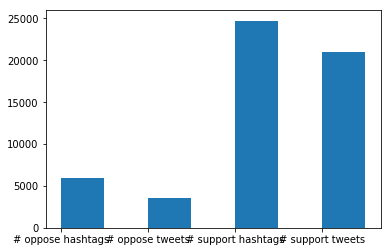

In [100]:
plt.show()